<a href="https://colab.research.google.com/github/vinayakareddy/Multi-Class-Text-Classification/blob/master/Education_comments_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/Political dataset/"

In [7]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
data = pd.read_csv(path+"education_sentimental analysis.csv", encoding="ISO-8859-1")

data.head()

,Video URL,Nickname,Comments,Classification
0,https://www.youtube.com/watch?v=YvLIPPgkJN8,NANHKURAM SHARMA,Sir bahot badhiya,Praising
1,https://www.youtube.com/watch?v=YvLIPPgkJN8,Chvshprasad,thank you very much sir this class is very hel...,Praising
2,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,75,Answers
3,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,Sahil sir u are A genius,Praising
4,https://www.youtube.com/watch?v=YvLIPPgkJN8,jyoti kumari,sir RRB Ka kb se state kigyegaa,Neutral


In [9]:
data.drop(['Video URL','Nickname'], axis=1)

,Comments,Classification
0,Sir bahot badhiya,Praising
1,thank you very much sir this class is very hel...,Praising
2,75,Answers
3,Sahil sir u are A genius,Praising
4,sir RRB Ka kb se state kigyegaa,Neutral
...,...,...
9523,sir maths ki class kab lagti h,Query
9524,sir reasoning ki calls kab lagti h,Query
9525,Sir alzebra k kitne parts bnaye h,Query
9526,Sir aap mathe kitne time padhate hai,Query


In [10]:
data.Classification.value_counts()

Praising    2382
Answers     2382
Query       2382
Neutral     2382
Name: Classification, dtype: int64

In [0]:
#Convert tags to integers as most of the machine learning¶
data['target'] = data.Classification.astype('category').cat.codes


In [0]:
#Calculate the number of words in each posts¶
data['num_words'] = data.Comments.apply(lambda x : len(x.split()))

In [13]:
data.head()

,Video URL,Nickname,Comments,Classification,target,num_words
0,https://www.youtube.com/watch?v=YvLIPPgkJN8,NANHKURAM SHARMA,Sir bahot badhiya,Praising,2,3
1,https://www.youtube.com/watch?v=YvLIPPgkJN8,Chvshprasad,thank you very much sir this class is very hel...,Praising,2,12
2,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,75,Answers,0,1
3,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,Sahil sir u are A genius,Praising,2,6
4,https://www.youtube.com/watch?v=YvLIPPgkJN8,jyoti kumari,sir RRB Ka kb se state kigyegaa,Neutral,1,7


In [14]:
data.drop(['Video URL','Nickname'], axis=1)

,Comments,Classification,target,num_words
0,Sir bahot badhiya,Praising,2,3
1,thank you very much sir this class is very hel...,Praising,2,12
2,75,Answers,0,1
3,Sahil sir u are A genius,Praising,2,6
4,sir RRB Ka kb se state kigyegaa,Neutral,1,7
...,...,...,...,...
9523,sir maths ki class kab lagti h,Query,3,7
9524,sir reasoning ki calls kab lagti h,Query,3,7
9525,Sir alzebra k kitne parts bnaye h,Query,3,7
9526,Sir aap mathe kitne time padhate hai,Query,3,7


In [0]:
#Set number of classes and target variable¶
num_class = len(np.unique(data.Classification.values))
y = data['target'].values

In [0]:
#Tokenize the input¶
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Comments.values)
post_seq = tokenizer.texts_to_sequences(data.Comments.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

Deep Learning Model : Simple¶


In [22]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          552320    
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 2,600,484
Trainable params: 2,600,484
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6788 samples, validate on 2263 samples
Epoch 1/5
6788/6788 [==============================] - 7s 965us/step - loss: 1.1149 - acc: 0.5028 - val_loss: 0.7275 - val_acc: 0.7247

Epoch 00001: val_acc improved from -inf to 0.72470, saving model to weights-simple.hdf5
Epoch 2/5
6788/6788 [==============================] - 6s 896us/step - loss: 0.5296 - acc: 0.8051 - val_loss: 0.4328 - val_acc: 0.8237

Epoch 00002: val_acc improved from 0.72470 to 0.82369, saving model to weights-simple.hdf5
Epoch 3/5
6788/6788 [==============================] - 6s 918us/step - loss: 0.3166 - acc: 0.8954 - val_loss: 0.3683 - val_acc: 0.8475

Epoch 00003: val_acc improved from 0.82369 to 0.84755, saving model to weights-simple.hdf5
Epoch 4/5
6788/6788 [==============================] - 6s 924us/step - loss: 0.2358 - acc: 0.9210 - val_loss: 0.3530 - val_acc: 0.8484

Epoch 00004: val_acc improved from 0.84755 to 0.84843, saving model to weights-simple.hdf5
Epoch 5/5
6788/6788 [==========================

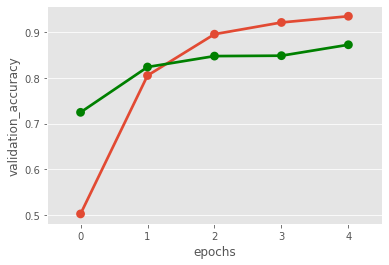

In [23]:
#Understanding the model fit¶
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [24]:
#accuracy
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.8553459119496856

Recurrent Neural Networks¶


In [25]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 128)          552320    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 603,940
Trainable params: 603,940
Non-trainable params: 0
_________________________________________________________________


In [26]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6788 samples, validate on 2263 samples
Epoch 1/10
6788/6788 [==============================] - 59s 9ms/step - loss: 0.9109 - acc: 0.6148 - val_loss: 0.5085 - val_acc: 0.8038

Epoch 00001: val_acc improved from -inf to 0.80380, saving model to weights.hdf5
Epoch 2/10
6788/6788 [==============================] - 60s 9ms/step - loss: 0.3920 - acc: 0.8461 - val_loss: 0.3624 - val_acc: 0.8511

Epoch 00002: val_acc improved from 0.80380 to 0.85108, saving model to weights.hdf5
Epoch 3/10
6788/6788 [==============================] - 59s 9ms/step - loss: 0.2550 - acc: 0.9041 - val_loss: 0.3237 - val_acc: 0.8657

Epoch 00003: val_acc improved from 0.85108 to 0.86567, saving model to weights.hdf5
Epoch 4/10
6788/6788 [==============================] - 57s 8ms/step - loss: 0.1992 - acc: 0.9247 - val_loss: 0.3398 - val_acc: 0.8723

Epoch 00004: val_acc improved from 0.86567 to 0.87229, saving model to weights.hdf5
Epoch 5/10
6788/6788 [==============================] - 57s 8ms/step - loss

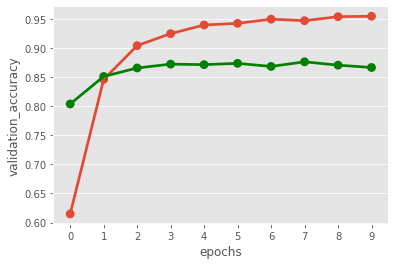

In [27]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [29]:
model.load_weights('weights.hdf5')
predicted = model.predict(X_test)
predicted

array([[2.32399837e-03, 8.96077394e-01, 1.01227105e-01, 3.71547620e-04],
       [6.89565029e-04, 5.59685886e-01, 4.39289093e-01, 3.35501623e-04],
       [5.28862357e-01, 4.44080532e-01, 2.01486442e-02, 6.90841209e-03],
       ...,
       [4.21803134e-06, 6.28674024e-05, 1.20375006e-07, 9.99932766e-01],
       [1.17698098e-02, 9.32679832e-01, 5.51147684e-02, 4.35612572e-04],
       [1.17092847e-03, 5.11729419e-01, 4.87024695e-01, 7.49249521e-05]],
      dtype=float32)

In [0]:
#Understanding Softmax¶
predicted = np.argmax(predicted, axis=1)

In [31]:
#Lets look at the accuracy¶
accuracy_score(y_test, predicted)

0.8805031446540881

In [0]:
#We were able to achieve an accuracy score of 88.05% which is pretty good and a huge jump over our simple model.

